In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Github

/content/drive/MyDrive/Github


In [4]:
!ls

Cohort_Analysis_for-retention_rate  Cohort_Analysis.ipynb  Dataset_ecommerce.csv


**Company: E-Shop Pro,
 Industry: E-Commerce**

E-Shop Pro is a leading online retailer offering a wide range of products, including
electronics, apparel, and home goods. With millions of customers globally, the
business prides itself on its fast delivery, customer-centric policies, and
personalized shopping experience. Some major achievements highlighted by the
company include:

*   Growth in user base by 30% annually over the last five years.

*   Implementation of a personalized recommendation system, improving
customer satisfaction.

*  Achieved 80% retention rate among VIP customers in the first two years of
loyalty program implementation.

 Despite its numerous successes, the company has encountered a formidable
challenge that has left its leadership team determined to find a solution: an
alarmingly high shopping cart abandonment rate.


**Business Problem**

The company is facing a significant challenge in retaining customers over time.
While the company experiences high customer acquisition rates, they are seeing
a drop-off in returning customers after the first purchase. Specific challenges
include:

*   Declining repeat purchase rate: New customers are not returning after their initial purchase
*   Customer churn: A noticeable percentage of customers leave after a
brief period of activity, increasing marketing and acquisition costs.

*   Low engagement: Customers show decreased interaction with the platform after their first few visits, indicating a failure to maintain long-term interest

 Resolving these issues is critical for improving customer lifetime value (CLV)
and overall business growth

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from matplotlib.ticker import FuncFormatter

Load and prepare dataset

In [10]:
# Load daatset

data = pd.read_csv("/content/drive/MyDrive/Github/Cohort_Analysis_for-retention_rate/Dataset_ecommerce.csv")
data

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda
...,...,...,...,...,...,...,...,...
541904,581587,2011-12-09 12:50:00,12680.0,SC5440,Furniture,25,36.53,Mozambique
541905,581587,2011-12-09 12:50:00,12680.0,SC3576,Cloths,94,90.65,Tunisia
541906,581587,2011-12-09 12:50:00,12680.0,SC5283,Furniture,14,40.07,Somalia
541907,581587,2011-12-09 12:50:00,12680.0,SC1099,Cosmetics,45,79.83,Senegal


In [11]:
data.describe(include ="all")

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
count,541909,541909,406829.000000,541909,541909,541909.000000,541909.000000,541909
unique,25900,23260,NaN,9000,10,NaN,NaN,28
top,573585,2011-10-31 14:41:00,NaN,SC2014,Sports Equipment,NaN,NaN,Cote d'Ivoire
freq,1114,1114,NaN,96,54765,NaN,NaN,19651
mean,NaN,NaN,15287.690570,NaN,NaN,50.534748,50.476354,NaN
std,NaN,NaN,1713.600303,NaN,NaN,28.849367,28.564775,NaN
min,NaN,NaN,12346.000000,NaN,NaN,1.000000,1.000000,NaN
25%,NaN,NaN,13953.000000,NaN,NaN,26.000000,25.750000,NaN
50%,NaN,NaN,15152.000000,NaN,NaN,51.000000,50.430000,NaN
75%,NaN,NaN,16791.000000,NaN,NaN,76.000000,75.180000,NaN


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   InvoiceDate  541909 non-null  object 
 2   CustomerID   406829 non-null  float64
 3   StockCode    541909 non-null  object 
 4   Description  541909 non-null  object 
 5   Quantity     541909 non-null  int64  
 6   UnitPrice    541909 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [13]:
data.isnull().sum()

,0
InvoiceNo,0
InvoiceDate,0
CustomerID,135080
StockCode,0
Description,0
Quantity,0
UnitPrice,0
Country,0


In [14]:
# Drop missing columm
data.dropna(inplace = True)

#we can only track the activities of customers that are known (those with customerID)

In [15]:
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"])

In [16]:
data

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda
...,...,...,...,...,...,...,...,...
541904,581587,2011-12-09 12:50:00,12680.0,SC5440,Furniture,25,36.53,Mozambique
541905,581587,2011-12-09 12:50:00,12680.0,SC3576,Cloths,94,90.65,Tunisia
541906,581587,2011-12-09 12:50:00,12680.0,SC5283,Furniture,14,40.07,Somalia
541907,581587,2011-12-09 12:50:00,12680.0,SC1099,Cosmetics,45,79.83,Senegal


In [17]:
data.describe(include ="all")

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
count,406829,406829,406829.000000,406829,406829,406829.000000,406829.000000,406829
unique,22190,NaN,NaN,9000,10,NaN,NaN,28
top,576339,NaN,NaN,SC2014,Jewelry,NaN,NaN,Nigeria
freq,542,NaN,NaN,79,41017,NaN,NaN,14714
mean,NaN,2011-07-10 16:30:57.879207424,15287.690570,NaN,NaN,50.478471,50.477654,NaN
min,NaN,2010-12-01 08:26:00,12346.000000,NaN,NaN,1.000000,1.000000,NaN
25%,NaN,2011-04-06 15:02:00,13953.000000,NaN,NaN,25.000000,25.710000,NaN
50%,NaN,2011-07-31 11:48:00,15152.000000,NaN,NaN,50.000000,50.430000,NaN
75%,NaN,2011-10-20 13:06:00,16791.000000,NaN,NaN,75.000000,75.170000,NaN
max,NaN,2011-12-09 12:50:00,18287.000000,NaN,NaN,100.000000,100.000000,NaN


In [18]:
num_unique_customers = data["CustomerID"].nunique()
print(f"Number of unique customers: {num_unique_customers}")

Number of unique customers: 4372


**Exploratory data analysis**

**Analysis by country**

In [19]:
#Bivariate analysis of countries and total number of purchase
quantity_per_country = data.groupby(["Country"])["Quantity"].sum().reset_index()
quantity_per_country = quantity_per_country.sort_values("Quantity", ascending = False).reset_index()

In [20]:
quantity_per_country.head()

,index,Country,Quantity
0,23,Togo,741223
1,20,South Africa,740589
2,4,Cote d'Ivoire,740229
3,15,Nigeria,739708
4,9,Libya,739206


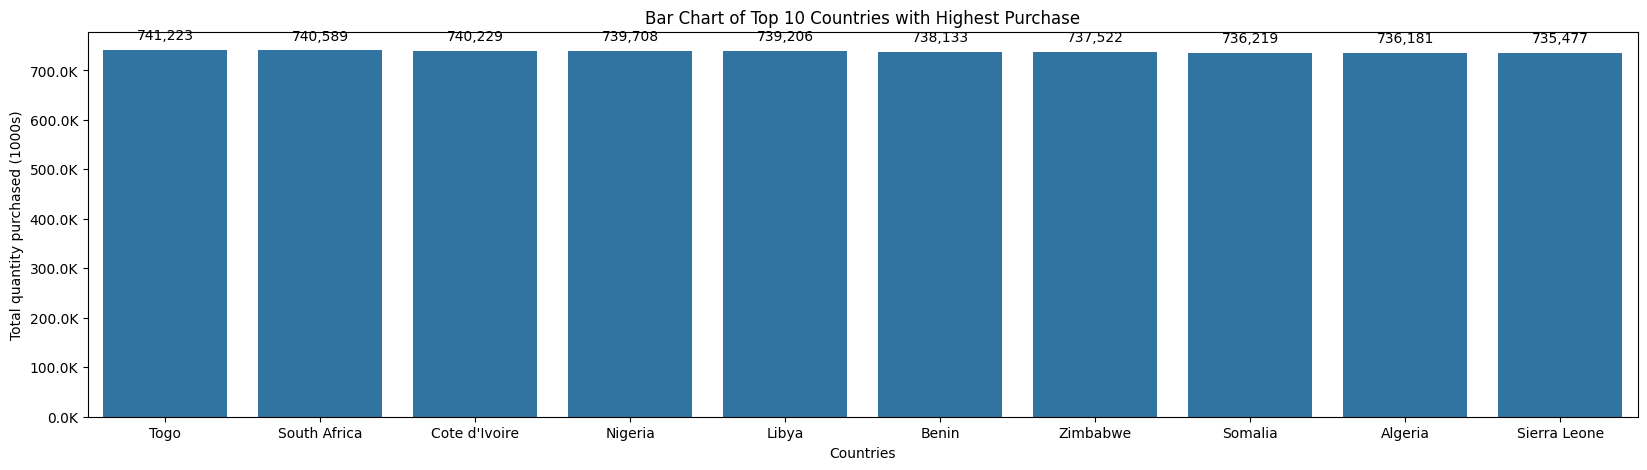

In [21]:
# Draw a plot of top 10 countries with highest number of quantity purchase
top_10_countries = quantity_per_country.head(10)

# Create a bar chart from the selected data
plt.figure(figsize=(20, 5))

y_format = FuncFormatter(lambda x, _: f'{x / 1000:.1f}K')
ax = sns.barplot(x='Country', y='Quantity', data=top_10_countries)
ax.yaxis.set_major_formatter(y_format)

# Add value labels on the bars
for index, row in top_10_countries.iterrows():
    ax.text(
        index,  # X-coordinate
        row['Quantity'] + 0.02 * max(top_10_countries['Quantity']),  # Y-coordinate (slightly above the bar)
        f"{row['Quantity']:,}",  # Label formatted with thousands separator
        ha='center',  # Center-align the text horizontally
        va='bottom',  # Bottom-align the text vertically
        fontsize=10,  # Font size of the label
        color='black'  # Label color
    )

# Customize labels and title
plt.xlabel('Countries')
plt.ylabel('Total quantity purchased (1000s)')
plt.title('Bar Chart of Top 10 Countries with Highest Purchase')
plt.show()


These countries represent the largest shares of product quantities and are critical to focus on for retention and engagement strategies.

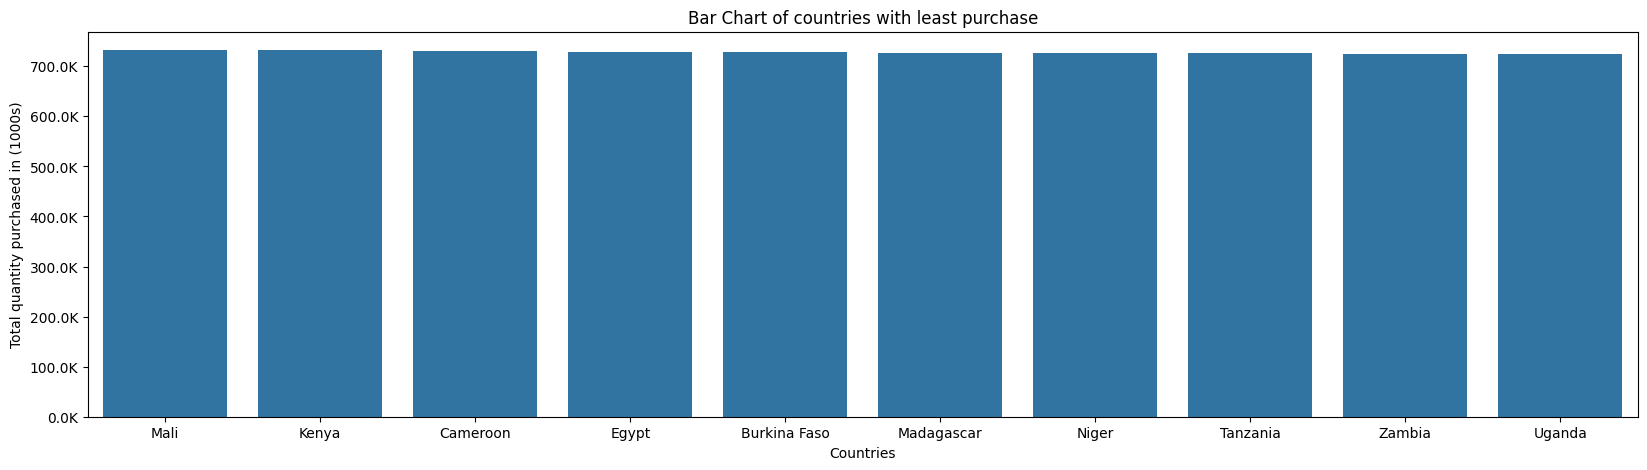

In [22]:
# Draw a plot of 10 countries with least number of quantity purchase
least_10_countries = quantity_per_country.tail(10)

# Create a bar chart from the selected data
plt.figure(figsize=(20, 5))

y_format = FuncFormatter(lambda x, _: f'{x / 1000:.1f}K')
ax = sns.barplot(x='Country', y='Quantity', data= least_10_countries)
ax.yaxis.set_major_formatter(y_format)

plt.xlabel('Countries')
plt.ylabel('Total quantity purchased in (1000s)')
plt.title('Bar Chart of countries with least purchase')
plt.show()

These countries have the lowest product quantities, which might indicate smaller customer bases or lower engagement.¶

Insights to Explore

Retention Focus on High-Quantity Countries:

- Togo, South Africa, and Cote d'Ivoire contribute significantly to sales quantities. Analyzing customer behavior and retention patterns in these countries can provide insights for targeted strategies. Low-Engagement Markets:

- Countries like Uganda, Zambia, and Tanzania might have unique challenges, such as lower product demand or limited engagement. Understanding barriers in these markets is essential. Correlation with Revenue:

- High quantities do not always equate to high revenue. Analyzing the relationship between quantity and revenue by country can highlight high-value markets.

Next Steps for Analysis

Retention and Churn by Country:

- Calculate retention rates and churn percentages for top and bottom countries to identify regional trends. Revenue Contribution:

- Multiply quantities by unit prices for each country to evaluate revenue distribution. Customer Segmentation by Region:

- Segment customers by country and analyze purchase patterns, repeat rates, and lifetime value. Tailored Engagement Strategies:

- Develop country-specific strategies for customer engagement and retention, focusing on the unique behavior of each region.


